In [8]:
import tensorflow as tf
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
import imghdr

In [9]:
import os

In [10]:
data_dir = 'data'

In [11]:
os.listdir(os.path.join(data_dir,'plastic_bottle'))

['.ipynb_checkpoints',
 '01-waterbottlesun_20190719_0023_3x4.jpg',
 '01_bottle_mm9070_190418_2400-2_3x2.jpg',
 '0_35L-Spirit-Bottle-000843-scaled.jpg',
 '100-reusable-and-disposable-transparents-plastic-mineral-water-bottle-101.jpg',
 '1000mljuice.jpg',
 '1000_F_294537209_JaQefXgA0A6O37NfDHTib6zROQcHT9Jd.jpg',
 '1000_F_483476302_AW6LylsJmPBPUt3bzAKbbqbuWPcSvPWg.jpg',
 '1000_F_97811746_HXlhlWPbyPTYlSasde1fL98nb38ozKE7.jpg',
 '102178025-Premium_Platic_Bottles.jpg',
 '1621891355680.jpg',
 '1_plastic_bottles_3600x.jpg',
 '220728-coke-bottles-mjf-0712-f4d231-Copy1.jpg',
 '220728-coke-bottles-mjf-0712-f4d231.jpg',
 '220px-Botella_de_plC3A1stico_-_PET.jpg',
 '360_F_169045283_VHcEEq0L7xL3w7O0504RdqlEwhcRUhhp.jpg',
 '360_F_498362712_7sJRmv7sOsfCtqieE0wtIjUpdUBvF4PY.jpg',
 '4-500x500.jpg',
 '5233546650_83e1b54cbd_o-b3f130fe446308cc6df17d2b2778966c2ed7e932.jpg',
 '550px-nowatermark-Clean-a-Plastic-Bottle-Step-1-Version-3.jpg',
 '60_ways_to_reuse_plastic_bottles.jpeg',
 '61Krpl7FGyL._AC_UF8941000_

In [12]:
image_exts = ['jpeg','jpg','bmp','png']

In [13]:
image_exts[2]

'bmp'

In [14]:
for image_class in os.listdir(data_dir):
    print(image_class)

.ipynb_checkpoints
non_plastic_bottle
plastic_bottle


In [15]:
img =cv2.imread(os.path.join('data','plastic_bottle','0_35L-Spirit-Bottle-000843-scaled.jpg'))

In [16]:
img.shape

AttributeError: 'NoneType' object has no attribute 'shape'

In [17]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

Issue with image edge_files\non_plastic_bottle\.ipynb_checkpoints
Issue with image edge_files\plastic_bottle\.ipynb_checkpoints


In [18]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 638 files belonging to 2 classes.


In [19]:
data = data.map(lambda x,y: (x/255, y))

In [20]:
scaled_iterator = data.as_numpy_iterator()

In [21]:
batch = scaled_iterator.next()

In [22]:
scaled = batch[0]/255

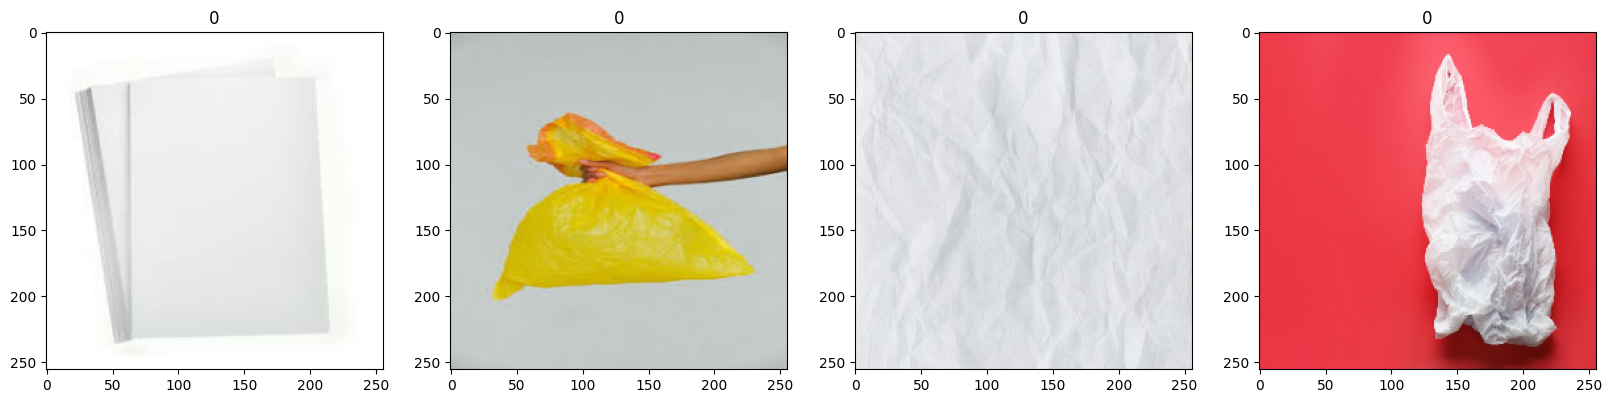

In [23]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [24]:
data.as_numpy_iterator().next()

(array([[[[0.98039216, 0.98039216, 0.98039216],
          [0.98039216, 0.98039216, 0.98039216],
          [0.98039216, 0.98039216, 0.98039216],
          ...,
          [0.9764706 , 0.9764706 , 0.9843137 ],
          [0.9764706 , 0.9764706 , 0.9843137 ],
          [0.9764706 , 0.9764706 , 0.9843137 ]],
 
         [[0.9773208 , 0.9773208 , 0.9773208 ],
          [0.9773208 , 0.9773208 , 0.9773208 ],
          [0.97961235, 0.97961235, 0.97961235],
          ...,
          [0.9764706 , 0.9764706 , 0.9843137 ],
          [0.9764706 , 0.9764706 , 0.9843137 ],
          [0.9764706 , 0.9764706 , 0.9843137 ]],
 
         [[0.9714614 , 0.9714614 , 0.9764706 ],
          [0.9714614 , 0.9714614 , 0.9764706 ],
          [0.9743872 , 0.9743872 , 0.97939646],
          ...,
          [0.9764706 , 0.9764706 , 0.9843137 ],
          [0.9764706 , 0.9764706 , 0.9843137 ],
          [0.9764706 , 0.9764706 , 0.9843137 ]],
 
         ...,
 
         [[0.85490197, 0.8745098 , 0.8901961 ],
          [0.84492

In [25]:
len(data)

20

In [26]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)+1

In [27]:
train_size

14

In [28]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [30]:
model = Sequential()

In [31]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [32]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

In [34]:
logdir='logs'

In [35]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [60]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
14/14 [==============================] - 14s 904ms/step - loss: 0.0685 - accuracy: 0.9844 - val_loss: 0.0314 - val_accuracy: 0.9875
Epoch 2/20
14/14 [==============================] - 14s 965ms/step - loss: 0.1731 - accuracy: 0.9576 - val_loss: 0.1329 - val_accuracy: 0.9625
Epoch 3/20
14/14 [==============================] - 13s 886ms/step - loss: 0.2024 - accuracy: 0.9464 - val_loss: 0.1807 - val_accuracy: 0.9250
Epoch 4/20
14/14 [==============================] - 14s 900ms/step - loss: 0.0956 - accuracy: 0.9688 - val_loss: 0.1110 - val_accuracy: 0.9625
Epoch 5/20
14/14 [==============================] - 14s 918ms/step - loss: 0.0759 - accuracy: 0.9754 - val_loss: 0.0482 - val_accuracy: 0.9812
Epoch 6/20
14/14 [==============================] - 14s 923ms/step - loss: 0.0393 - accuracy: 0.9911 - val_loss: 0.0463 - val_accuracy: 0.9812
Epoch 7/20
14/14 [==============================] - 14s 934ms/step - loss: 0.0290 - accuracy: 0.9933 - val_loss: 0.0394 - val_accuracy: 0.9812

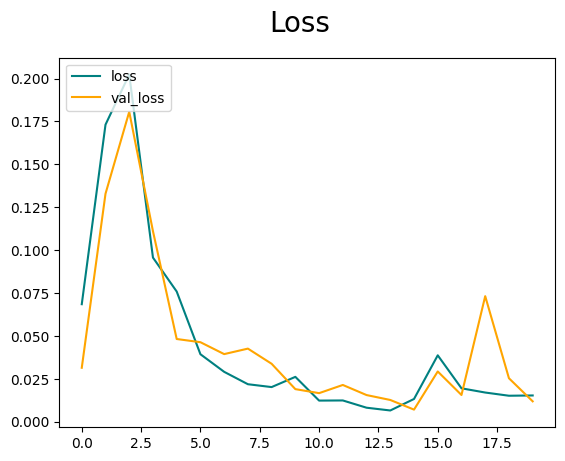

In [61]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

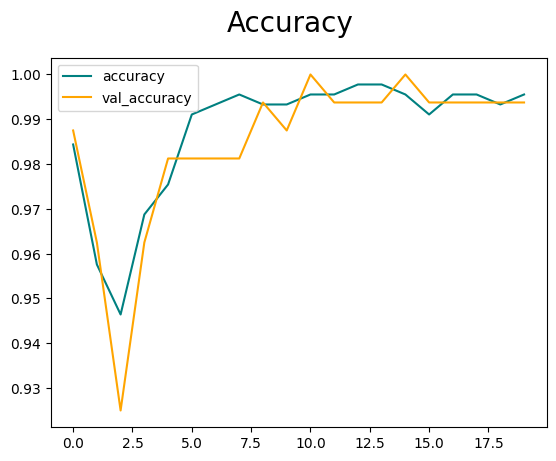

In [62]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [63]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [64]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [65]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 148ms/step


In [66]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


In [67]:
import cv2

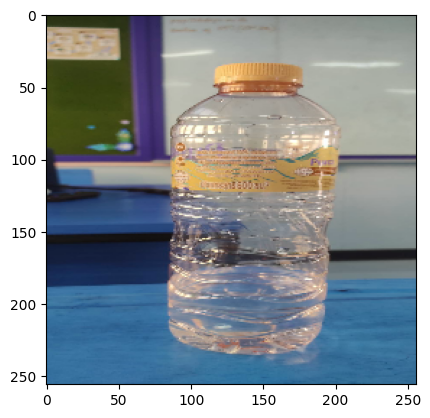

1/1 [==============================] - 0s 40ms/step
Predicted class is non_plastic_bottle


In [80]:
img = cv2.imread('test/plastic_bottle/9.jpg')
plt.imshow(img)
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()
yhat = model.predict(np.expand_dims(resize/255, 0))
if yhat > 0.5: 
    print(f'Predicted class is plastic_bottle')
else:
    print(f'Predicted class is non_plastic_bottle')

In [ ]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [73]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 31ms/step


In [74]:
yhat

array([[0.01071497]], dtype=float32)

In [75]:
if yhat > 0.5: 
    print(f'Predicted class is plastic_bottle')
else:
    print(f'Predicted class is non_plastic_bottle')

Predicted class is non_plastic_bottle


In [139]:
from tensorflow.keras.models import load_model

In [122]:
model.save(os.path.join('models','imageclassifier.h5'))

In [5]:
new_model = load_model('models/imageclassifier.h5')

NameError: name 'load_model' is not defined

In [ ]:
new_model.predict(np.expand_dims(resize/255, 0))